<a href="https://colab.research.google.com/github/ashmeenkhaira/Machine-learning-/blob/main/decisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib
%matplotlib inline




In [ ]:
file_path = "/content/weatherAUS.csv"

In [ ]:
rawdata = pd.read_csv(file_path)

In [ ]:
rawdata

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
rawdata.dropna(subset=['RainTomorrow'],inplace=True)

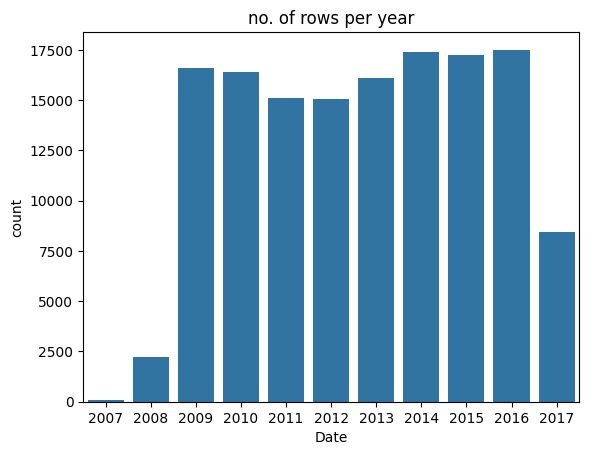

In [ ]:
plt.title('no. of rows per year')
sns.countplot(x=pd.to_datetime(rawdata.Date).dt.year);

In [ ]:
year = pd.to_datetime(rawdata.Date).dt.year
traindf = rawdata[year<2015]
valdf = rawdata[year==2015]
testdf = rawdata[year>2015]

In [ ]:
print('traindf.shape:',traindf.shape)
print('valdf.shape:',valdf.shape)
print('testdf:',testdf.shape)

traindf.shape: (98988, 23)
valdf.shape: (17231, 23)
testdf: (25974, 23)


In [ ]:
input_cols = list(traindf.columns[1:-1])
target_col = 'RainTomorrow'

In [ ]:
train_in = traindf[input_cols].copy()
train_targ = traindf[target_col].copy()

In [ ]:
val_in = valdf[input_cols].copy()
val_targ = valdf[target_col].copy()

In [ ]:
test_in = testdf[input_cols].copy()
test_targ = testdf[target_col].copy()

In [ ]:
numeric_col=train_in.select_dtypes(include=np.number).columns.tolist()
categorical_col = train_in.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_col)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
print(categorical_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [ ]:
train_in[numeric_col].isna().sum().sort_values(ascending=False)

,0
Sunshine,40696
Evaporation,37110
Cloud3pm,36766
Cloud9am,35764
Pressure9am,9345
Pressure3pm,9309
WindGustSpeed,6902
Humidity9am,1265
Humidity3pm,1186
WindSpeed3pm,1140


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(rawdata[numeric_col])

In [ ]:
train_in[numeric_col] = imputer.transform(train_in[numeric_col])
val_in[numeric_col] = imputer.transform(val_in[numeric_col])
test_in[numeric_col] = imputer.transform(test_in[numeric_col])

In [ ]:
test_in[numeric_col].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder

train_in[categorical_col]=train_in[categorical_col].fillna('unknown')
val_in[categorical_col]=val_in[categorical_col].fillna('unknown')
test_in[categorical_col]=test_in[categorical_col].fillna('unknown')

# Use categorical_col instead of categorical_cols
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_in[categorical_col])

In [ ]:
encoded_col = list(encoder.get_feature_names_out(categorical_col)) # Use get_feature_names_out instead of get_feature_names

In [ ]:
train_in[encoded_col]= encoder.transform(train_in[categorical_col])
val_in[encoded_col] = encoder.transform(val_in[categorical_col])
test_in[encoded_col] = encoder.transform(test_in[categorical_col])

<ipython-input-26-9863bba1a741>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_in[encoded_col]= encoder.transform(train_in[categorical_col])
<ipython-input-26-9863bba1a741>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_in[encoded_col]= encoder.transform(train_in[categorical_col])
<ipython-input-26-9863bba1a741>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

In [ ]:
test_in

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_unknown,RainToday_No,RainToday_Yes,RainToday_unknown
2498,Albury,20.4,37.6,0.0,5.469824,7.624853,ENE,54.0,unknown,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,20.9,33.6,0.4,5.469824,7.624853,SSE,50.0,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,18.4,23.1,2.2,5.469824,7.624853,ENE,48.0,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,Albury,17.3,23.7,15.6,5.469824,7.624853,SSE,39.0,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2502,Albury,15.5,22.9,6.8,5.469824,7.624853,ENE,31.0,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x_train = train_in[numeric_col+encoded_col]
x_val = val_in[numeric_col+encoded_col]
x_test = test_in[numeric_col+encoded_col]

In [ ]:
train_targ

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
144548,No
144549,No
144550,No
144551,No


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(x_train,train_targ)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_preds = model.predict(x_train)

In [ ]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
pd.value_counts(train_preds)

<ipython-input-37-5a0b2543de7a>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


,count
No,76707
Yes,22281


In [ ]:
train_preds = model.predict_proba(x_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_probs = model.predict_proba(x_train)

In [ ]:
accuracy_score(train_preds,train_targ)

0.9999797955307714

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Obtain predicted class labels instead of probabilities
train_preds = model.predict(x_train)

# Now calculate the accuracy score
accuracy = accuracy_score(train_targ, train_preds)  # Note: train_targ should be the first argument

print(f"Accuracy: {accuracy}")

Accuracy: 0.9999797955307714


In [ ]:
train_probs = model.predict_proba(x_train)

In [ ]:
accuracy_score(train_targ,train_preds)

0.9999797955307714

In [ ]:
model.score(x_val,val_targ)

0.792292960362138

In [ ]:
val_targ.value_counts()/len(val_targ)

,count
RainTomorrow,
No,0.788289
Yes,0.211711


In [ ]:
from sklearn.tree import plot_tree, export_text

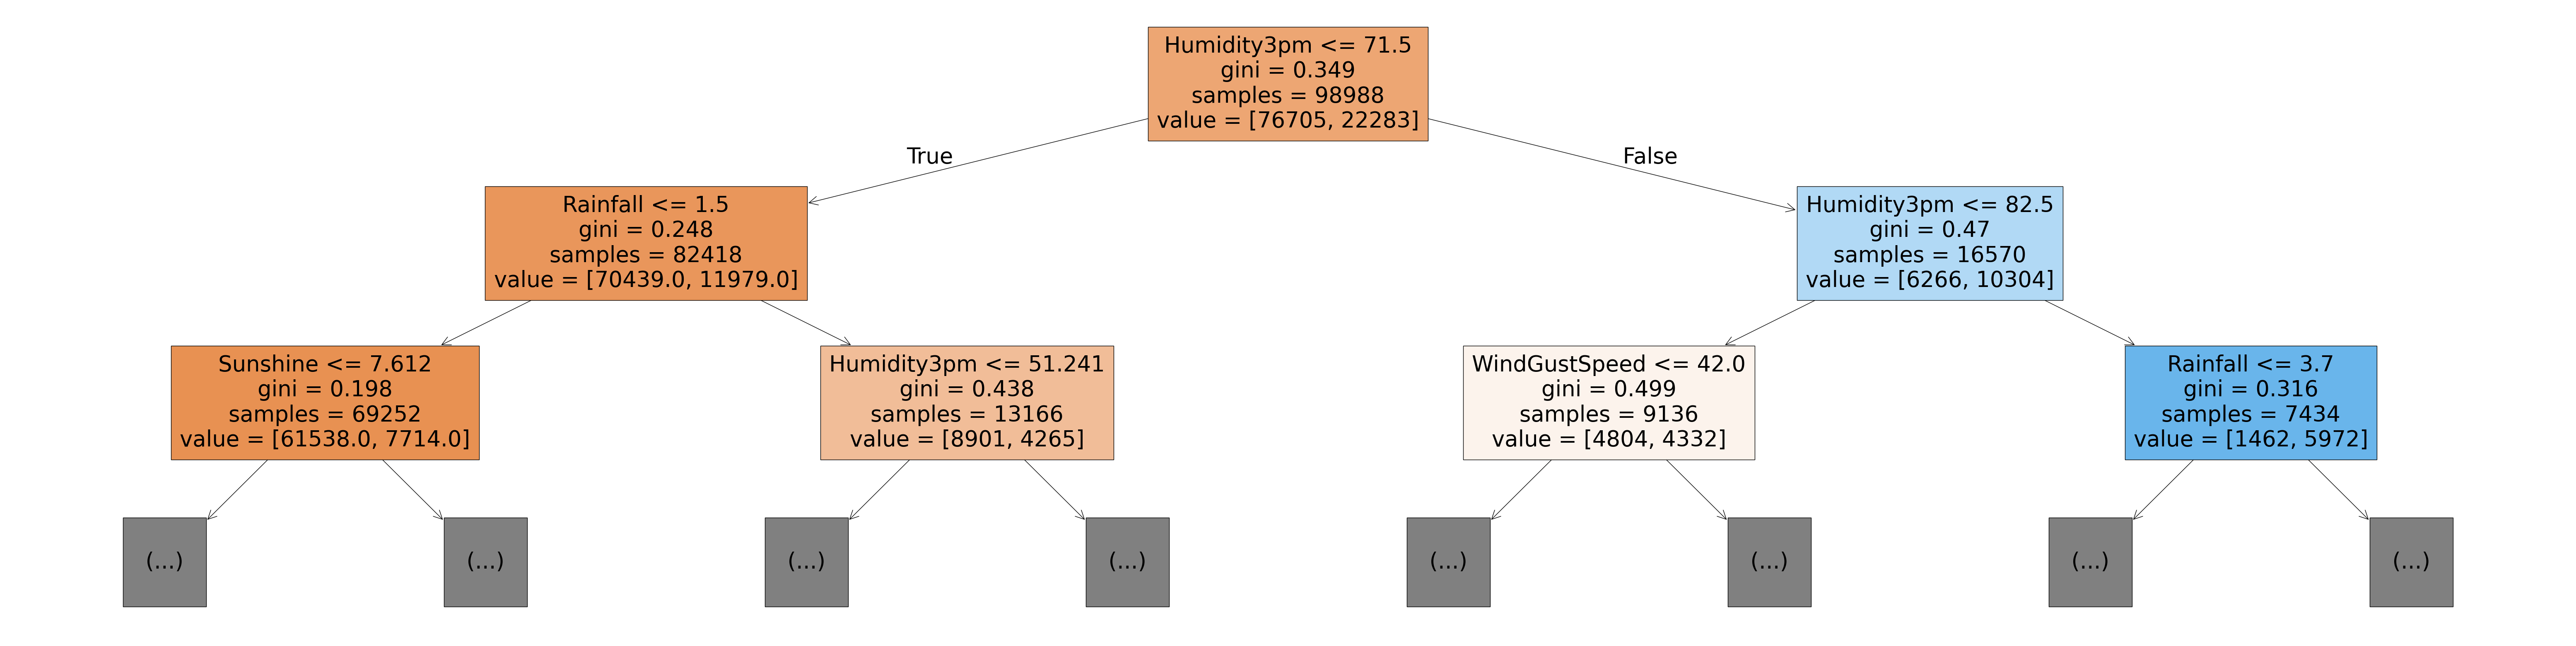

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=x_train.columns,max_depth=2,filled=True);

In [ ]:
 model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [ ]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance',ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.fit(x_train,train_targ)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
model.score(x_train,train_targ)

0.8291308037337859

In [ ]:
model.score(x_val,val_targ)

0.8334397307178921

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

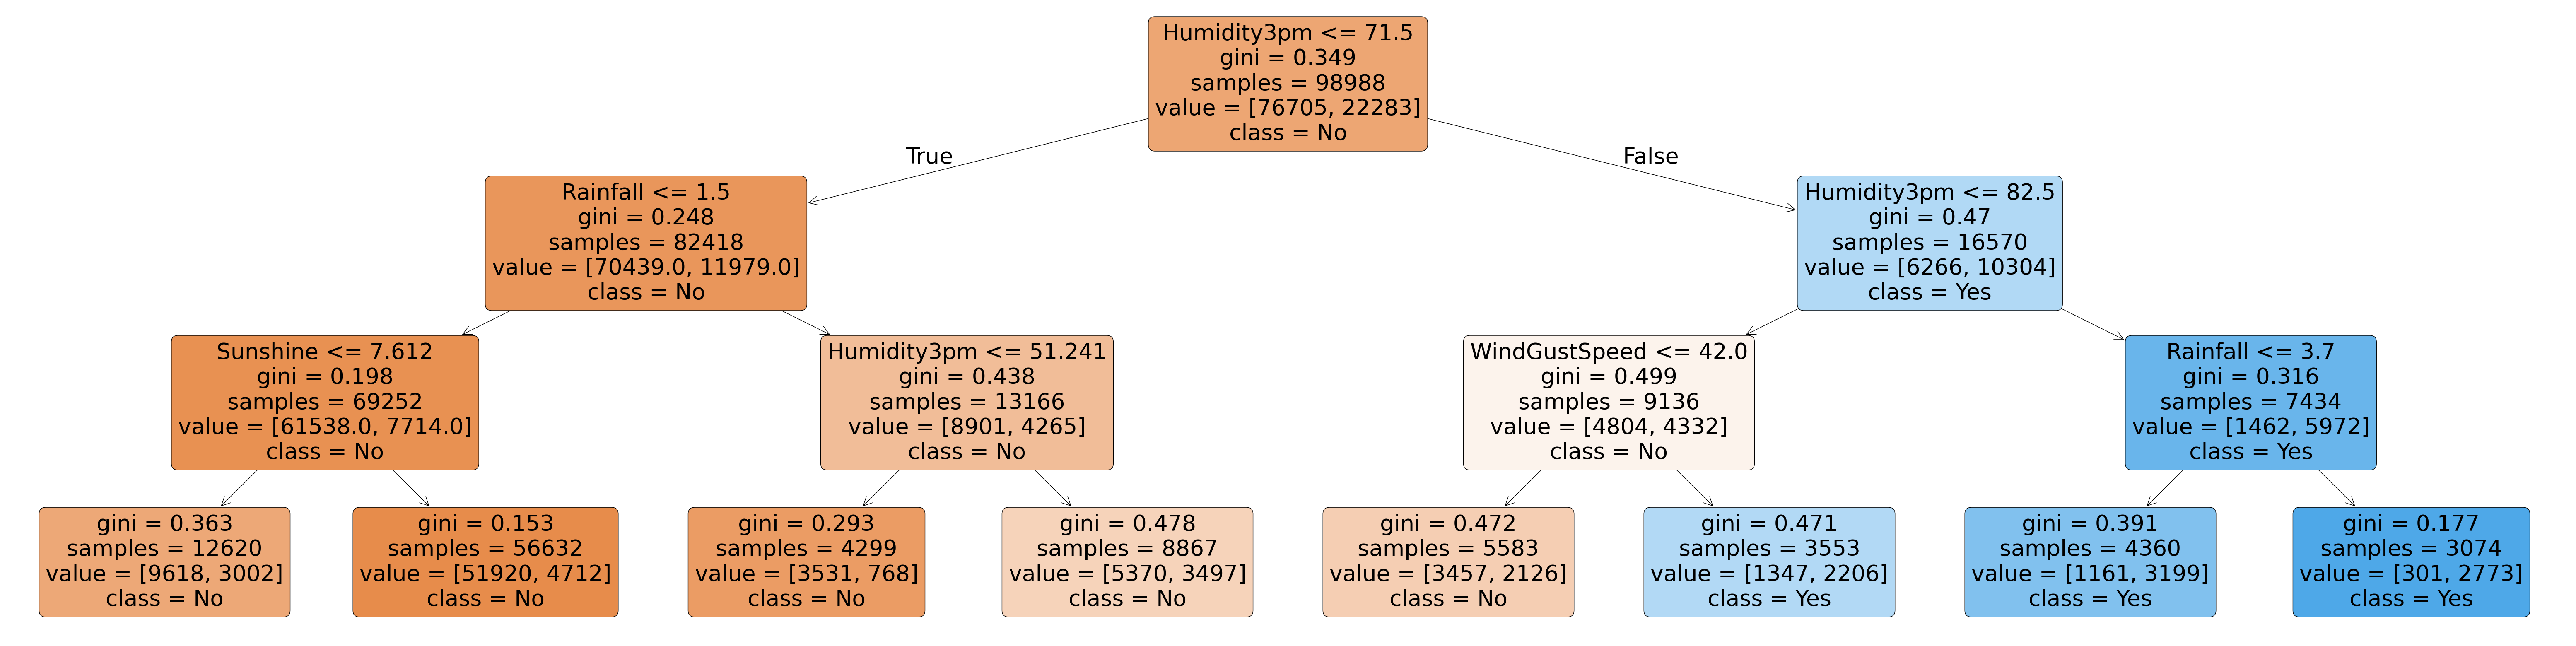

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=x_train.columns,filled=True, rounded =True,class_names=model.classes_);

In [ ]:
print(export_text(model, feature_names=list(x_train.columns)))

|--- Humidity3pm <= 71.50
|   |--- Rainfall <= 1.50
|   |   |--- Sunshine <= 7.61
|   |   |   |--- class: No
|   |   |--- Sunshine >  7.61
|   |   |   |--- class: No
|   |--- Rainfall >  1.50
|   |   |--- Humidity3pm <= 51.24
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  51.24
|   |   |   |--- class: No
|--- Humidity3pm >  71.50
|   |--- Humidity3pm <= 82.50
|   |   |--- WindGustSpeed <= 42.00
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  42.00
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  82.50
|   |   |--- Rainfall <= 3.70
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  3.70
|   |   |   |--- class: Yes



In [ ]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(x_train,train_targ)
  train_acc = 1-model.score(x_train,train_targ)
  val_acc = 1-model.score(x_val,val_targ)
  return{'max depth':md, 'training error':train_acc, 'validation error':val_acc}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])

In [ ]:
model= DecisionTreeClassifier(max_depth=7,random_state=42).fit(x_train,train_targ)
model.score(x_val, val_targ)

0.8453949277465034

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=130, random_state=42)

In [ ]:
model.fit(x_train,train_targ)

DecisionTreeClassifier(max_leaf_nodes=130, random_state=42)

In [ ]:
model.score(x_val,val_targ)

0.8446404735650862

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.fit(x_train,train_targ)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(x_train,train_targ)

0.9999494888269285

In [ ]:
model.score(x_val,val_targ)

0.8568278103418258